In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data   = pd.read_csv('Sliders First Five.csv')
future = pd.read_csv('Slider Six - Predict.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8299 entries, 0 to 8298
Data columns (total 29 columns):
Slider #       8299 non-null int64
Season         8299 non-null int64
CustomerID     8299 non-null int64
T_Frequency    8299 non-null int64
T_Recency      8299 non-null int64
T_First Day    8299 non-null object
T_Last Day     8299 non-null object
T_Revenue      8299 non-null float64
T_Cost         8299 non-null float64
T_Profit       8299 non-null float64
T_Duration     8299 non-null int64
T_IPT          8299 non-null float64
T_GM%          8299 non-null float64
Frequency      8299 non-null int64
Recency        8299 non-null int64
First Day      8299 non-null object
Last Day       8299 non-null object
Revenue        8299 non-null float64
Cost           8299 non-null float64
Profit         8299 non-null float64
Unit Sales     8299 non-null float64
Duration       8299 non-null int64
IPT            8299 non-null float64
GM%            8299 non-null float64
Central        8299 non-nul

,Slider #,Season,CustomerID,T_Frequency,T_Recency,T_First Day,T_Last Day,T_Revenue,T_Cost,T_Profit,...,Profit,Unit Sales,Duration,IPT,GM%,Central,North,South,West,Score
0,1,4,12347,1,24,12/7/2017,12/7/2017,218.054862,221.407357,-3.352495,...,257.840047,4866.57250,188,62.666667,0.049936,0,1,0,0,2.50
1,1,4,12352,1,58,11/3/2017,11/3/2017,247.394929,237.833029,9.561900,...,271.712700,601.42750,224,37.333333,0.266238,1,0,0,0,2.00
2,1,4,12358,1,23,12/8/2017,12/8/2017,162.601854,173.927709,-11.325855,...,23.313165,80.30000,0,279.000000,0.230425,0,0,1,0,2.25
3,1,4,12359,2,29,10/13/2017,12/2/2017,17321.015880,9058.471098,8262.544785,...,23859.597940,1882.85325,26,26.000000,0.587721,0,0,0,1,4.50
4,1,4,12360,1,74,10/18/2017,10/18/2017,1049.099664,973.805382,75.294281,...,207.911754,1451.86750,88,88.000000,0.104777,0,0,1,0,2.50


In [4]:
data.describe()

,Slider #,Season,CustomerID,T_Frequency,T_Recency,T_Revenue,T_Cost,T_Profit,T_Duration,T_IPT,...,Profit,Unit Sales,Duration,IPT,GM%,Central,North,South,West,Score
count,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,...,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000
mean,3.138450,2.918785,15283.928425,14.665140,23.872997,2821.062912,2382.108757,438.954156,47.328112,23.240169,...,828.100665,4856.112482,144.293288,57.728345,0.100415,0.396674,0.337511,0.095915,0.169900,3.015198
std,1.386413,1.047398,1725.798927,29.343209,25.219017,11145.608289,8284.732175,5605.007157,32.609893,32.359297,...,4322.781449,14736.061606,90.207797,87.670864,0.141650,0.489237,0.472889,0.294493,0.375568,0.953841
min,1.000000,1.000000,12347.000000,1.000000,0.000000,0.207875,0.000000,-13644.398870,0.000000,0.000000,...,-14360.629840,0.300000,0.000000,0.000000,-3.467832,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,13815.000000,2.000000,3.000000,220.116163,195.308822,1.298308,14.000000,4.000000,...,11.649218,420.725035,66.000000,7.250000,0.023286,0.000000,0.000000,0.000000,0.000000,2.250000
50%,3.000000,3.000000,15236.000000,6.000000,15.000000,699.323156,620.193886,39.775340,54.000000,8.000000,...,92.204731,1244.844700,157.000000,19.000000,0.086136,0.000000,0.000000,0.000000,0.000000,3.000000
75%,4.000000,4.000000,16802.500000,15.000000,38.000000,1862.323031,1678.291173,171.677050,77.000000,20.000000,...,368.414158,3422.148300,229.000000,53.000000,0.168536,1.000000,1.000000,0.000000,0.000000,3.750000
max,5.000000,4.000000,18287.000000,744.000000,91.000000,457177.414100,282028.616500,452603.780100,91.000000,93.000000,...,129859.486300,308335.875000,273.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [5]:
# exploration
variables = ['Season','T_Profit','T_Revenue','Frequency','Recency','Revenue','GM%','Cost',
             'Profit','Duration','IPT','Unit Sales','Central','North','South','West']


data[variables].describe()

,Season,T_Profit,T_Revenue,Frequency,Recency,Revenue,GM%,Cost,Profit,Duration,IPT,Unit Sales,Central,North,South,West
count,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000
mean,2.918785,438.954156,2821.062912,22.685866,39.476804,6058.618211,0.100415,5230.517546,828.100665,144.293288,57.728345,4856.112482,0.396674,0.337511,0.095915,0.169900
std,1.047398,5605.007157,11145.608289,54.101308,59.680000,18411.037770,0.141650,15662.931707,4322.781449,90.207797,87.670864,14736.061606,0.489237,0.472889,0.294493,0.375568
min,1.000000,-13644.398870,0.207875,1.000000,0.000000,0.776620,-3.467832,0.000000,-14360.629840,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.298308,220.116163,3.000000,2.000000,515.875712,0.023286,460.073582,11.649218,66.000000,7.250000,420.725035,0.000000,0.000000,0.000000,0.000000
50%,3.000000,39.775340,699.323156,8.000000,10.000000,1522.551450,0.086136,1350.427230,92.204731,157.000000,19.000000,1244.844700,0.000000,0.000000,0.000000,0.000000
75%,4.000000,171.677050,1862.323031,21.000000,47.000000,4271.846393,0.168536,3878.278987,368.414158,229.000000,53.000000,3422.148300,1.000000,1.000000,0.000000,0.000000
max,4.000000,452603.780100,457177.414100,1508.000000,274.000000,447117.326400,1.000000,409230.648900,129859.486300,273.000000,279.000000,308335.875000,1.000000,1.000000,1.000000,1.000000


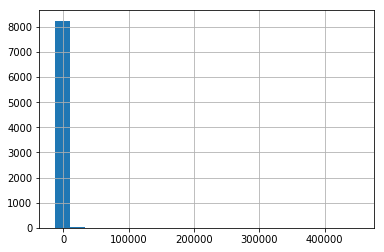

In [6]:
data['T_Profit'].hist(bins = 20)
plt.show()

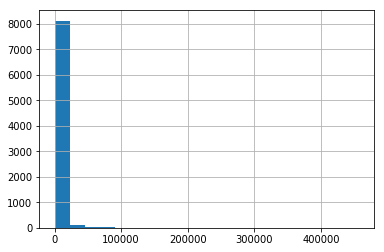

In [7]:
data['T_Revenue'].hist(bins = 20)
plt.show()

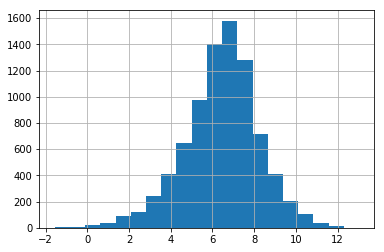

In [8]:
data['L_Revenue'] = np.log(data['T_Revenue'])

data['L_Revenue'].hist(bins = 20)
plt.show()

In [9]:
variables.append('L_Revenue')

data[variables].corr()

# no variable highly correlated to profit, revenue, or log revenue, so no data leakage

,Season,T_Profit,T_Revenue,Frequency,Recency,Revenue,GM%,Cost,Profit,Duration,IPT,Unit Sales,Central,North,South,West,L_Revenue
Season,1.000000,0.005520,0.000201,0.169831,-0.218342,0.009727,0.024827,0.005550,0.021318,0.038736,-0.084451,0.009229,0.019134,-0.028836,0.199118,-0.144749,0.027257
T_Profit,0.005520,1.000000,0.696352,0.094301,-0.018974,0.145795,0.083231,0.084976,0.313053,0.029507,-0.026895,0.091690,-0.044370,0.034096,0.033185,-0.011153,0.163320
T_Revenue,0.000201,0.696352,1.000000,0.275990,-0.070085,0.423169,0.054948,0.414214,0.301466,0.137781,-0.088243,0.381671,-0.108470,0.105928,0.016193,-0.004774,0.428519
Frequency,0.169831,0.094301,0.275990,1.000000,-0.223617,0.467594,0.062589,0.467855,0.296318,0.334859,-0.233545,0.488100,-0.157311,0.213509,-0.079095,-0.001892,0.324950
Recency,-0.218342,-0.018974,-0.070085,-0.223617,1.000000,-0.116786,-0.008523,-0.118029,-0.069740,-0.542913,0.511776,-0.119268,0.101354,-0.104735,0.021972,-0.017384,-0.239562
Revenue,0.009727,0.145795,0.423169,0.467594,-0.116786,1.000000,0.084263,0.980694,0.705677,0.253624,-0.150086,0.968392,-0.170537,0.180540,-0.021185,0.011440,0.312367
GM%,0.024827,0.083231,0.054948,0.062589,-0.008523,0.084263,1.000000,0.027335,0.259838,0.031322,-0.040759,0.057314,-0.025338,0.025797,-0.013339,0.010983,0.025257
Cost,0.005550,0.084976,0.414214,0.467855,-0.118029,0.980694,0.027335,1.000000,0.553502,0.259143,-0.150564,0.955758,-0.169300,0.179684,-0.028338,0.016515,0.316273
Profit,0.021318,0.313053,0.301466,0.296318,-0.069740,0.705677,0.259838,0.553502,1.000000,0.141240,-0.093681,0.661408,-0.112899,0.117879,0.012449,-0.011118,0.184428
Duration,0.038736,0.029507,0.137781,0.334859,-0.542913,0.253624,0.031322,0.259143,0.141240,1.000000,-0.536811,0.252868,-0.208360,0.325962,-0.298323,0.094915,0.329585


In [10]:
dummy = pd.get_dummies(data['Season'])

dummy.info()
dummy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8299 entries, 0 to 8298
Data columns (total 4 columns):
1    8299 non-null uint8
2    8299 non-null uint8
3    8299 non-null uint8
4    8299 non-null uint8
dtypes: uint8(4)
memory usage: 32.5 KB


,1,2,3,4
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [11]:
dummy.rename(columns={1: 'Season 1',
                      2: 'Season 2',
                      3: 'Season 3',
                      4: 'Season 4'}, inplace=True)

d = pd.concat([data,dummy], axis = 1)

d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8299 entries, 0 to 8298
Data columns (total 34 columns):
Slider #       8299 non-null int64
Season         8299 non-null int64
CustomerID     8299 non-null int64
T_Frequency    8299 non-null int64
T_Recency      8299 non-null int64
T_First Day    8299 non-null object
T_Last Day     8299 non-null object
T_Revenue      8299 non-null float64
T_Cost         8299 non-null float64
T_Profit       8299 non-null float64
T_Duration     8299 non-null int64
T_IPT          8299 non-null float64
T_GM%          8299 non-null float64
Frequency      8299 non-null int64
Recency        8299 non-null int64
First Day      8299 non-null object
Last Day       8299 non-null object
Revenue        8299 non-null float64
Cost           8299 non-null float64
Profit         8299 non-null float64
Unit Sales     8299 non-null float64
Duration       8299 non-null int64
IPT            8299 non-null float64
GM%            8299 non-null float64
Central        8299 non-nul

,Slider #,Season,CustomerID,T_Frequency,T_Recency,T_First Day,T_Last Day,T_Revenue,T_Cost,T_Profit,...,Central,North,South,West,Score,L_Revenue,Season 1,Season 2,Season 3,Season 4
0,1,4,12347,1,24,12/7/2017,12/7/2017,218.054862,221.407357,-3.352495,...,0,1,0,0,2.50,5.384747,0,0,0,1
1,1,4,12352,1,58,11/3/2017,11/3/2017,247.394929,237.833029,9.561900,...,1,0,0,0,2.00,5.510986,0,0,0,1
2,1,4,12358,1,23,12/8/2017,12/8/2017,162.601854,173.927709,-11.325855,...,0,0,1,0,2.25,5.091305,0,0,0,1
3,1,4,12359,2,29,10/13/2017,12/2/2017,17321.015880,9058.471098,8262.544785,...,0,0,0,1,4.50,9.759676,0,0,0,1
4,1,4,12360,1,74,10/18/2017,10/18/2017,1049.099664,973.805382,75.294281,...,0,0,1,0,2.50,6.955688,0,0,0,1


Plan A: Try use slider # 5 as testing data

In [38]:
# training: tr, testing: te
tr = d[d['Slider #']!=5]
te = d[d['Slider #']==5]

# central and season 4 are excluded from features to avoid perfect collinearity
X_label = ['Frequency','Recency','Revenue','GM%','Cost','Profit','Duration','IPT','Unit Sales',
           'North','South','West','Season 1','Season 2','Season 3']

x_tr = tr[X_label]
x_te = te[X_label]

y_tr1 = tr['T_Profit']
y_te1 = te['T_Profit']
y_tr2 = tr['T_Revenue']
y_te2 = te['T_Revenue']
y_tr3 = tr['L_Revenue']
y_te3 = te['L_Revenue']

print(x_tr.shape,x_te.shape,y_tr1.shape,y_te1.shape)

(6692, 15) (1607, 15) (6692,) (1607,)


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_tr = scaler.fit_transform(x_tr)
x_te = scaler.transform(x_te)

x_tr1 = x_tr
x_tr2 = x_tr
x_tr3 = x_tr
x_te1 = x_te
x_te2 = x_te
x_te3 = x_te

C:\Users\STU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Plan A: Try use slider # 5 as testing data

Plan B: Try randomly split data

In [12]:
X_label = ['Frequency','Recency','Revenue','GM%','Cost','Profit','Duration','IPT','Unit Sales',
           'North','South','West','Season 1','Season 2','Season 3']

X  = d[X_label]
Y1 = data['T_Profit']
Y2 = data['T_Revenue']
Y3 = data['L_Revenue']

print(X.shape,Y1.shape,Y2.shape,Y3.shape)

(8299, 15) (8299,) (8299,) (8299,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_tr1,x_te1,y_tr1,y_te1 = train_test_split(X,Y1,random_state=10)
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(X,Y2,random_state=10)
x_tr3,x_te3,y_tr3,y_te3 = train_test_split(X,Y3,random_state=10)

scaler = MinMaxScaler()

x_tr1 = scaler.fit_transform(x_tr1)
x_tr2 = scaler.fit_transform(x_tr2)
x_tr3 = scaler.fit_transform(x_tr3)

x_te1 = scaler.transform(x_te1)
x_te2 = scaler.transform(x_te2)
x_te3 = scaler.transform(x_te3)

print(x_tr1.shape,x_tr2.shape,x_tr3.shape)

(6224, 15) (6224, 15) (6224, 15)


C:\Users\STU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\STU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\STU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Plan B: Try randomly split data

In [40]:
# try basic regressors first
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,LassoCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

XY_list    = [(x_tr1,y_tr1),(x_tr2,y_tr2),(x_tr3,y_tr3)]
Y_list_idx = ['Y1','Y2','Y3']

In [41]:
# knn grid
grid_scores = []
grid_params = []

param_grid = {'n_neighbors': range(1,100)}

for (x,y) in XY_list:
    grid = GridSearchCV(KNeighborsRegressor(), param_grid)
    grid.fit(x,y)
    grid_scores.append(grid.best_score_)
    grid_params.append(grid.best_params_)

grid_scores = pd.DataFrame(grid_scores)
grid_params = pd.DataFrame(grid_params)
grid_scores = grid_scores.set_index([Y_list_idx])
grid_params = grid_params.set_index([Y_list_idx])
grid_scores.columns = ['scores']
grid_params.columns = ['params']

kreg_grid = pd.concat([grid_scores,grid_params], axis = 1)
kreg_grid

C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


,scores,params
Y1,0.015120,98
Y2,0.109868,13
Y3,0.173981,31


In [42]:
# ridge grid
grid_scores = []
grid_params = []

param_grid = {'alpha': [0.01,0.1,1,10,100]}

for (x,y) in XY_list:
    grid = GridSearchCV(Ridge(), param_grid, cv = 5)
    grid.fit(x,y)
    grid_scores.append(grid.best_score_)
    grid_params.append(grid.best_params_)

grid_scores = pd.DataFrame(grid_scores)
grid_params = pd.DataFrame(grid_params)
grid_scores = grid_scores.set_index([Y_list_idx])
grid_params = grid_params.set_index([Y_list_idx])
grid_scores.columns = ['scores']
grid_params.columns = ['params']

rdge_grid = pd.concat([grid_scores,grid_params], axis = 1)
rdge_grid

,scores,params
Y1,0.054258,1.00
Y2,0.235777,0.01
Y3,0.194054,1.00


In [44]:
# svm grid
grid_scores = []
grid_params = []

param_grid = {'C'      : [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma'  : [0.1, 1, 10]}

for (x,y) in XY_list:
    grid = GridSearchCV(SVR(kernel = 'rbf'), param_grid)
    grid.fit(x,y)
    grid_scores.append(grid.best_score_)
    grid_params.append(grid.best_params_)

grid_scores = pd.DataFrame(grid_scores)
grid_params = pd.DataFrame(grid_params)
grid_scores = grid_scores.set_index([Y_list_idx])
grid_params = grid_params.set_index([Y_list_idx])
grid_scores.columns = ['scores']
grid_params.columns = ['param1','param2','param3']

sreg_grid = pd.concat([grid_scores,grid_params], axis = 1)
sreg_grid

C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


,scores,param1,param2,param3
Y1,-0.003317,100,100,1.0
Y2,-0.020413,100,1,0.1
Y3,0.220076,100,1,0.1


In [45]:
# tree grid
grid_scores = []
grid_params = []

param_grid = {'max_depth'     : [1,2,3],
              'max_leaf_nodes': [5,10,15,20],
              'splitter'      : ['best','random']}

for (x,y) in XY_list:
    grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv = 5)
    grid.fit(x,y)
    grid_scores.append(grid.best_score_)
    grid_params.append(grid.best_params_)

grid_scores = pd.DataFrame(grid_scores)
grid_params = pd.DataFrame(grid_params)
grid_scores = grid_scores.set_index([Y_list_idx])
grid_params = grid_params.set_index([Y_list_idx])
grid_scores.columns = ['scores']
grid_params.columns = ['param1','param2','param3']

tree_grid = pd.concat([grid_scores,grid_params], axis = 1)
tree_grid

C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,scores,param1,param2,param3
Y1,0.033043,1,5,random
Y2,0.163147,2,5,best
Y3,0.238403,3,20,best


In [46]:
# forest grid
from sklearn.ensemble import RandomForestRegressor

grid_scores = []
grid_params = []

param_grid = {'max_leaf_nodes': range(10,21),
              'n_estimators'  : range(10,21)}

for (x,y) in XY_list:
    grid = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv = 5)
    grid.fit(x,y)
    grid_scores.append(grid.best_score_)
    grid_params.append(grid.best_params_)

grid_scores = pd.DataFrame(grid_scores)
grid_params = pd.DataFrame(grid_params)
grid_scores = grid_scores.set_index([Y_list_idx])
grid_params = grid_params.set_index([Y_list_idx])
grid_scores.columns = ['scores']
grid_params.columns = ['param1','param2']

rdft_grid = pd.concat([grid_scores,grid_params], axis = 1)
rdft_grid

,scores,param1,param2
Y1,-0.118824,10,12
Y2,0.170997,10,15
Y3,0.273792,20,13


In [51]:
# summary for y1 - profit
from sklearn.ensemble import RandomForestRegressor

kreg = KNeighborsRegressor(n_neighbors=98)
lreg = LinearRegression()
rdge = Ridge(alpha=1)
lass = LassoCV(cv=5)
sreg = SVR(kernel='rbf', C=100,  epsilon=100, gamma=1)
tree = DecisionTreeRegressor(splitter='random', max_depth=1, max_leaf_nodes=5, random_state=0)
rdft = RandomForestRegressor(n_estimators=12, max_leaf_nodes=10, random_state=0)

models    = [kreg,lreg,rdge,lass,sreg,tree,rdft]
model_idx = ['kreg','lreg','rdge','lass','sreg','tree','rdft']

In [52]:
scores1 = []
scores2 = []

for item in models:
    item.fit(x_tr1,y_tr1)
    pred = item.predict(x_te1)
    scores1.append(r2_score(y_te1,pred))
    scores2.append(mean_squared_error(y_te1,pred))

scores1 = pd.DataFrame(scores1)
scores2 = pd.DataFrame(scores2)
scores1 = scores1.set_index([model_idx])
scores2 = scores2.set_index([model_idx])
scores1.columns = ['profit_R2']
scores2.columns = ['profit_MSE']

score_Y1 = pd.concat([scores1,scores2], axis = 1)
score_Y1

,profit_R2,profit_MSE
kreg,0.001669,1.304500e+08
lreg,0.038859,1.255904e+08
rdge,0.029830,1.267703e+08
lass,0.035963,1.259689e+08
sreg,-0.000330,1.307111e+08
tree,-0.011639,1.321890e+08
rdft,0.029677,1.267903e+08


In [53]:
# summary for y2 - revenue
from sklearn.ensemble import RandomForestRegressor

kreg = KNeighborsRegressor(n_neighbors=13)
lreg = LinearRegression()
rdge = Ridge(alpha=0.01)
lass = LassoCV(cv=5)
sreg = SVR(kernel='rbf', C=100,  epsilon=1, gamma=0.1)
tree = DecisionTreeRegressor(splitter='best', max_depth=2, max_leaf_nodes=5, random_state=0)
rdft = RandomForestRegressor(n_estimators=15, max_leaf_nodes=10, random_state=0)

models    = [kreg,lreg,rdge,lass,sreg,tree,rdft]
model_idx = ['kreg','lreg','rdge','lass','sreg','tree','rdft']

In [54]:
scores1 = []
scores2 = []

for item in models:
    item.fit(x_tr2,y_tr2)
    pred = item.predict(x_te2)
    scores1.append(r2_score(y_te2,pred))
    scores2.append(mean_squared_error(y_te2,pred))

scores1 = pd.DataFrame(scores1)
scores2 = pd.DataFrame(scores2)
scores1 = scores1.set_index([model_idx])
scores2 = scores2.set_index([model_idx])
scores1.columns = ['revenue_R2']
scores2.columns = ['revenue_MSE']

score_Y2 = pd.concat([scores1,scores2], axis = 1)
score_Y2

,revenue_R2,revenue_MSE
kreg,0.123119,1.834999e+08
lreg,-0.122933,2.349899e+08
rdge,-0.116854,2.337178e+08
lass,-0.116853,2.337177e+08
sreg,-0.005040,2.103192e+08
tree,-0.092311,2.285819e+08
rdft,-0.037475,2.171066e+08


In [55]:
# summary for y3 - log revenue
from sklearn.ensemble import RandomForestRegressor

kreg = KNeighborsRegressor(n_neighbors=31)
lreg = LinearRegression()
rdge = Ridge(alpha=1)
lass = LassoCV(cv=5)
sreg = SVR(kernel='rbf', C=100,  epsilon=1, gamma=0.1)
tree = DecisionTreeRegressor(splitter='best', max_depth=3, max_leaf_nodes=20, random_state=0)
rdft = RandomForestRegressor(n_estimators=13, max_leaf_nodes=20, random_state=0)

models    = [kreg,lreg,rdge,lass,sreg,tree,rdft]
model_idx = ['kreg','lreg','rdge','lass','sreg','tree','rdft']

In [56]:
scores1 = []
scores2 = []

for item in models:
    item.fit(x_tr3,y_tr3)
    pred = item.predict(x_te3)
    scores1.append(r2_score(y_te3,pred))
    scores2.append(mean_squared_error(y_te3,pred))

scores1 = pd.DataFrame(scores1)
scores2 = pd.DataFrame(scores2)
scores1 = scores1.set_index([model_idx])
scores2 = scores2.set_index([model_idx])
scores1.columns = ['logrev_R2']
scores2.columns = ['logrev_MSE']

score_Y3 = pd.concat([scores1,scores2], axis = 1)
score_Y3

,logrev_R2,logrev_MSE
kreg,0.105540,3.276310
lreg,-0.163622,4.262220
rdge,-0.105770,4.050314
lass,-0.064853,3.900440
sreg,-0.164277,4.264619
tree,0.078734,3.374495
rdft,0.119694,3.224465


In [47]:
# try mlp
from keras.models import Sequential
from keras.layers import Dense

# define model
sque = Sequential()
sque.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
sque.add(Dense(8, kernel_initializer='normal', activation='relu'))
sque.add(Dense(1, kernel_initializer='normal'))

In [48]:
# compile model
sque.compile(loss='mse',optimizer='adam',metrics = ['mse'])

In [49]:
# prepare for grid search
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def grid_keras():
    model = Sequential()
    model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse',optimizer='adam',metrics = ['mse'])
    return model

keras_reg = KerasRegressor(build_fn = grid_keras, verbose = 0)

In [50]:
# keras grid
grid_scores = []
grid_params = []

param_grid = {'batch_size': [5,10,20,50,100],
              'epochs'    : [50,100,200]}

for (x,y) in XY_list:
    grid = GridSearchCV(keras_reg, param_grid, cv=5)
    grid.fit(x,y)
    grid_scores.append(grid.best_score_)
    grid_params.append(grid.best_params_)

grid_scores = pd.DataFrame(grid_scores)
grid_params = pd.DataFrame(grid_params)
grid_scores = grid_scores.set_index([Y_list_idx])
grid_params = grid_params.set_index([Y_list_idx])
grid_scores.columns = ['scores']
grid_params.columns = ['param1','param2']

kera_grid = pd.concat([grid_scores,grid_params], axis = 1)
kera_grid

C:\Users\STU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,scores,param1,param2
Y1,-7.110497e+06,5,200
Y2,-7.860344e+07,5,200
Y3,-2.271835e+00,5,200


In [57]:
# fit model for Y1
sque.fit(x_tr1, y_tr1, epochs=200, batch_size=5)

Epoch 1/200
6692/6692 [==============================] - 12s 2ms/step - loss: 7705259.3565 - mean_squared_error: 7705259.3565
Epoch 2/200
6692/6692 [==============================] - 5s 731us/step - loss: 7610454.7535 - mean_squared_error: 7610454.7535
Epoch 3/200
6692/6692 [==============================] - 5s 757us/step - loss: 7529801.4086 - mean_squared_error: 7529801.4086
Epoch 4/200
6692/6692 [==============================] - 5s 780us/step - loss: 7503037.7006 - mean_squared_error: 7503037.7006
Epoch 5/200
6692/6692 [==============================] - 5s 794us/step - loss: 7488019.8530 - mean_squared_error: 7488019.8530
Epoch 6/200
6692/6692 [==============================] - 5s 709us/step - loss: 7478820.2235 - mean_squared_error: 7478820.2235
Epoch 7/200
6692/6692 [==============================] - 4s 665us/step - loss: 7470051.7745 - mean_squared_error: 7470051.7745
Epoch 8/200
6692/6692 [==============================] - 4s 652us/step - loss: 7462439.1706 - mean_squared_error

6692/6692 [==============================] - 5s 735us/step - loss: 7085548.3106 - mean_squared_error: 7085548.3106
Epoch 66/200
6692/6692 [==============================] - 5s 733us/step - loss: 7083731.4802 - mean_squared_error: 7083731.4802
Epoch 67/200
6692/6692 [==============================] - 5s 729us/step - loss: 7084026.7211 - mean_squared_error: 7084026.7211
Epoch 68/200
6692/6692 [==============================] - 5s 731us/step - loss: 7080568.1724 - mean_squared_error: 7080568.1724
Epoch 69/200
6692/6692 [==============================] - 5s 741us/step - loss: 7079179.7062 - mean_squared_error: 7079179.7062
Epoch 70/200
6692/6692 [==============================] - 5s 739us/step - loss: 7078069.6789 - mean_squared_error: 7078069.6789
Epoch 71/200
6692/6692 [==============================] - 5s 746us/step - loss: 7077083.6246 - mean_squared_error: 7077083.6246
Epoch 72/200
6692/6692 [==============================] - 5s 734us/step - loss: 7075152.7683 - mean_squared_error: 70

6692/6692 [==============================] - 5s 728us/step - loss: 7015491.0383 - mean_squared_error: 7015491.0383
Epoch 129/200
6692/6692 [==============================] - 5s 727us/step - loss: 7012906.4761 - mean_squared_error: 7012906.4761
Epoch 130/200
6692/6692 [==============================] - 5s 730us/step - loss: 7013299.9423 - mean_squared_error: 7013299.9423
Epoch 131/200
6692/6692 [==============================] - 5s 746us/step - loss: 7013159.6210 - mean_squared_error: 7013159.6210
Epoch 132/200
6692/6692 [==============================] - 5s 729us/step - loss: 7010873.7561 - mean_squared_error: 7010873.7561
Epoch 133/200
6692/6692 [==============================] - 5s 733us/step - loss: 7009990.2371 - mean_squared_error: 7009990.2371
Epoch 134/200
6692/6692 [==============================] - 5s 744us/step - loss: 7009442.9301 - mean_squared_error: 7009442.9301
Epoch 135/200
6692/6692 [==============================] - 5s 736us/step - loss: 7007449.6061 - mean_squared_er

6692/6692 [==============================] - 5s 743us/step - loss: 6965748.5654 - mean_squared_error: 6965748.5654
Epoch 192/200
6692/6692 [==============================] - 5s 734us/step - loss: 6964642.3342 - mean_squared_error: 6964642.3342
Epoch 193/200
6692/6692 [==============================] - 5s 734us/step - loss: 6964006.2626 - mean_squared_error: 6964006.2626
Epoch 194/200
6692/6692 [==============================] - 5s 741us/step - loss: 6963846.3091 - mean_squared_error: 6963846.3091
Epoch 195/200
6692/6692 [==============================] - 5s 734us/step - loss: 6963112.0432 - mean_squared_error: 6963112.0432
Epoch 196/200
6692/6692 [==============================] - 5s 735us/step - loss: 6962527.7949 - mean_squared_error: 6962527.7949
Epoch 197/200
6692/6692 [==============================] - 5s 735us/step - loss: 6958823.8677 - mean_squared_error: 6958823.8677
Epoch 198/200
6692/6692 [==============================] - 5s 735us/step - loss: 6961072.1578 - mean_squared_er

In [58]:
# evaluat model for Y1
sque_pred1 = sque.predict(x_te1)
r2_score(y_te1,sque_pred1)

0.008740762394810364

In [59]:
# fit model for Y2
sque.fit(x_tr2, y_tr2, epochs=200, batch_size=5)

Epoch 1/200
6692/6692 [==============================] - 5s 733us/step - loss: 96630710.0229 - mean_squared_error: 96630710.0229
Epoch 2/200
6692/6692 [==============================] - 5s 731us/step - loss: 92117240.5227 - mean_squared_error: 92117240.5227
Epoch 3/200
6692/6692 [==============================] - 5s 729us/step - loss: 90960127.2908 - mean_squared_error: 90960127.2908
Epoch 4/200
6692/6692 [==============================] - 5s 731us/step - loss: 90232470.3699 - mean_squared_error: 90232470.3699
Epoch 5/200
6692/6692 [==============================] - 5s 738us/step - loss: 89593333.6567 - mean_squared_error: 89593333.6567
Epoch 6/200
6692/6692 [==============================] - 5s 740us/step - loss: 89007034.5036 - mean_squared_error: 89007034.5036
Epoch 7/200
6692/6692 [==============================] - 5s 733us/step - loss: 88444899.0677 - mean_squared_error: 88444899.0677
Epoch 8/200
6692/6692 [==============================] - 5s 733us/step - loss: 87895326.6159 - me

6692/6692 [==============================] - 5s 728us/step - loss: 78431118.7353 - mean_squared_error: 78431118.7353
Epoch 65/200
6692/6692 [==============================] - 5s 726us/step - loss: 78402578.8786 - mean_squared_error: 78402578.8786
Epoch 66/200
6692/6692 [==============================] - 5s 733us/step - loss: 78395116.2320 - mean_squared_error: 78395116.2320
Epoch 67/200
6692/6692 [==============================] - 5s 732us/step - loss: 78364762.4380 - mean_squared_error: 78364762.4380
Epoch 68/200
6692/6692 [==============================] - 5s 730us/step - loss: 78341687.3996 - mean_squared_error: 78341687.3996
Epoch 69/200
6692/6692 [==============================] - 5s 731us/step - loss: 78327317.3311 - mean_squared_error: 78327317.3311
Epoch 70/200
6692/6692 [==============================] - 5s 732us/step - loss: 78289599.3777 - mean_squared_error: 78289599.3777
Epoch 71/200
6692/6692 [==============================] - 5s 736us/step - loss: 78295901.9166 - mean_sq

6692/6692 [==============================] - 5s 738us/step - loss: 77044547.1100 - mean_squared_error: 77044547.1100
Epoch 127/200
6692/6692 [==============================] - 5s 733us/step - loss: 77008576.2753 - mean_squared_error: 77008576.2753
Epoch 128/200
6692/6692 [==============================] - 5s 729us/step - loss: 76990633.6659 - mean_squared_error: 76990633.6659
Epoch 129/200
6692/6692 [==============================] - 5s 729us/step - loss: 76978634.4077 - mean_squared_error: 76978634.4077
Epoch 130/200
6692/6692 [==============================] - 5s 729us/step - loss: 76951059.6341 - mean_squared_error: 76951059.6341
Epoch 131/200
6692/6692 [==============================] - 5s 730us/step - loss: 76918270.4486 - mean_squared_error: 76918270.4486
Epoch 132/200
6692/6692 [==============================] - 5s 730us/step - loss: 76907570.4159 - mean_squared_error: 76907570.4159
Epoch 133/200
6692/6692 [==============================] - 5s 729us/step - loss: 76873881.2540 - 

6692/6692 [==============================] - 5s 731us/step - loss: 75708466.2231 - mean_squared_error: 75708466.2231
Epoch 189/200
6692/6692 [==============================] - 5s 729us/step - loss: 75700178.6228 - mean_squared_error: 75700178.6228
Epoch 190/200
6692/6692 [==============================] - 5s 728us/step - loss: 75700547.8525 - mean_squared_error: 75700547.8525
Epoch 191/200
6692/6692 [==============================] - 5s 727us/step - loss: 75671945.4431 - mean_squared_error: 75671945.4431
Epoch 192/200
6692/6692 [==============================] - 5s 727us/step - loss: 75658939.0502 - mean_squared_error: 75658939.0502
Epoch 193/200
6692/6692 [==============================] - 5s 729us/step - loss: 75631978.7046 - mean_squared_error: 75631978.7046
Epoch 194/200
6692/6692 [==============================] - 5s 733us/step - loss: 75614935.9430 - mean_squared_error: 75614935.9430
Epoch 195/200
6692/6692 [==============================] - 5s 734us/step - loss: 75597404.4231 - 

In [60]:
# evaluat model for Y2
sque_pred2 = sque.predict(x_te2)
r2_score(y_te2,sque_pred2)

-0.2897949967714719

In [61]:
# fit model for Y3
sque.fit(x_tr3, y_tr3, epochs=200, batch_size=5)

Epoch 1/200
6692/6692 [==============================] - 5s 733us/step - loss: 22360177.8376 - mean_squared_error: 22360177.8376
Epoch 2/200
6692/6692 [==============================] - 5s 730us/step - loss: 12201960.5894 - mean_squared_error: 12201960.5894
Epoch 3/200
6692/6692 [==============================] - 5s 733us/step - loss: 8051054.5676 - mean_squared_error: 8051054.5676
Epoch 4/200
6692/6692 [==============================] - 5s 727us/step - loss: 5697664.3338 - mean_squared_error: 5697664.3338
Epoch 5/200
6692/6692 [==============================] - 5s 734us/step - loss: 4171613.6033 - mean_squared_error: 4171613.6033
Epoch 6/200
6692/6692 [==============================] - 5s 732us/step - loss: 3164174.6801 - mean_squared_error: 3164174.6801
Epoch 7/200
6692/6692 [==============================] - 5s 734us/step - loss: 2445879.3520 - mean_squared_error: 2445879.3520
Epoch 8/200
6692/6692 [==============================] - 5s 735us/step - loss: 1906039.4264 - mean_squared_

6692/6692 [==============================] - 5s 727us/step - loss: 60.7845 - mean_squared_error: 60.7845
Epoch 68/200
6692/6692 [==============================] - 5s 727us/step - loss: 38.4578 - mean_squared_error: 38.4578
Epoch 69/200
6692/6692 [==============================] - 5s 725us/step - loss: 23.5754 - mean_squared_error: 23.5754
Epoch 70/200
6692/6692 [==============================] - 5s 728us/step - loss: 11.9817 - mean_squared_error: 11.9817
Epoch 71/200
6692/6692 [==============================] - 5s 735us/step - loss: 6.1569 - mean_squared_error: 6.1569
Epoch 72/200
6692/6692 [==============================] - 5s 740us/step - loss: 4.0854 - mean_squared_error: 4.0854
Epoch 73/200
6692/6692 [==============================] - 5s 731us/step - loss: 3.5843 - mean_squared_error: 3.5843
Epoch 74/200
6692/6692 [==============================] - 5s 732us/step - loss: 3.2502 - mean_squared_error: 3.2502
Epoch 75/200
6692/6692 [==============================] - 5s 734us/step - los

6692/6692 [==============================] - 5s 751us/step - loss: 3.1648 - mean_squared_error: 3.16480s - loss: 3.1465 - mean_squar
Epoch 137/200
6692/6692 [==============================] - 5s 725us/step - loss: 3.1709 - mean_squared_error: 3.1709
Epoch 138/200
6692/6692 [==============================] - 5s 728us/step - loss: 3.1690 - mean_squared_error: 3.1690
Epoch 139/200
6692/6692 [==============================] - 5s 728us/step - loss: 3.1703 - mean_squared_error: 3.1703
Epoch 140/200
6692/6692 [==============================] - 5s 726us/step - loss: 3.1691 - mean_squared_error: 3.1691
Epoch 141/200
6692/6692 [==============================] - 5s 725us/step - loss: 3.1705 - mean_squared_error: 3.1705
Epoch 142/200
6692/6692 [==============================] - 5s 727us/step - loss: 3.1677 - mean_squared_error: 3.1677
Epoch 143/200
6692/6692 [==============================] - 5s 727us/step - loss: 3.1693 - mean_squared_error: 3.1693
Epoch 144/200
6692/6692 [=======================

In [62]:
# evaluat model for Y3
sque_pred3 = sque.predict(x_te3)
r2_score(y_te3,sque_pred3)

-127519.72522833198